# student_dropout dataset 

## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

## 2. Loading the Dataset

In [ ]:
# Load the Salary Dataset
data = pd.read_csv(r'E:\Neuronetix Traning\Tasks\Task 3\Datasets\student_dropout.csv')  
data.head()  # Preview the data


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 3. Data Preprocessing

In [ ]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
data['Course'] = le.fit_transform(data['Course'])

le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])

# # Encode the target column
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Define features (Course, Admission grade, Age at enrollment) and target variable (Target)
X = data[['Course', 'Admission grade', 'Age at enrollment']]  
y = data['Target']


## 4. Train-Test Split

In [ ]:
# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and R2 for Test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set MSE: {mse}, MAE: {mae}, R²: {r2}")


Test Set MSE: 0.7560121905656007, MAE: 0.7869628107245347, R²: 0.07362231344907044


## 5. Train-Val-Test Split

In [ ]:
# Split the data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
model.fit(X_train, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Set MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")


Validation Set MSE: 0.7381904529425022, MAE: 0.7770692119856181, R²: 0.0593276364374713
Test Set MSE: 0.7573137056449705, MAE: 0.7866153022384273, R²: 0.07202750513343237


## 6. Cross-Validation

In [ ]:
# Perform 5-Fold Cross Validation
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")


Cross-Validation MSE: 0.7335045990772405, MAE: 0.7777437810868338, R²: 0.06759243313730814


## 7. Confusion Matrix (Demonstration)


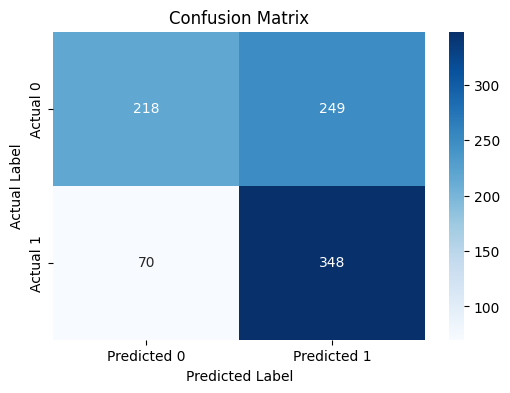

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply threshold for binary classification (for illustration purposes)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


## 8. ROC Curve and AUC (Demonstration)

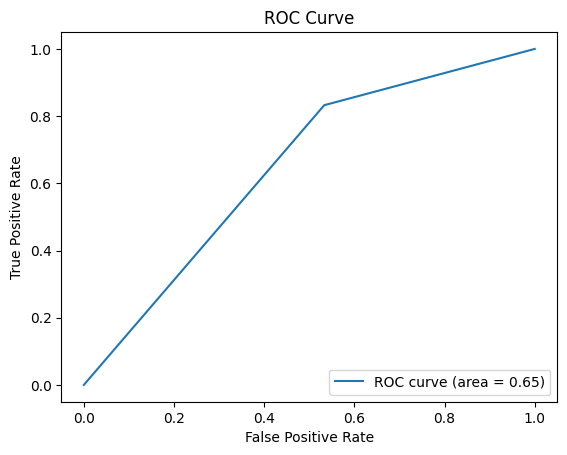

In [ ]:
# Calculate ROC and AUC for binary outputs
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 9. Summary of Results

In [ ]:
print(f"Train-Test Split MSE: {mse}, MAE: {mae}, R²: {r2}")
print(f"Train-Val-Test Split MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Train-Test Split MSE: 0.7560121905656007, MAE: 0.7869628107245347, R²: 0.07362231344907044
Train-Val-Test Split MSE: 0.7381904529425022, MAE: 0.7770692119856181, R²: 0.0593276364374713
Cross-Validation MSE: 0.7335045990772405, MAE: 0.7777437810868338, R²: 0.06759243313730814
